 YOLO (You Only Look Once) is state-of-the-art, real-time object detection algorithm. Here i am using yolo-v3 from DarkNet (creators of yolo). The reason behind yolo being famous is that it was the first algorithm to classify and locate an object in one/single step (this is where its name came from).
 Modern algorithms including ssd and maskrcnn etc are giving better results thepresent days (December 2019)

In [1]:
#Importing libraries
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [2]:
# Set the location and name of the cfg file
cfg_file = './cfg/yolov3.cfg'

# Set the location and name of the pre-trained weights file
weight_file = 'C:/Users/Bakhtawar Rehman/Downloads/yolov3.weights'

# Set the location and name of the COCO object classes file
namesfile = 'data/coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

In [11]:
#setting non-maximal-suppression threshold
nms = 0.7
#setting intersetion/union
iou = 0.6

def imageProcessor(img):
    # Set the fig size for o/p display (relatively large for detailed observation)
    plt.rcParams['figure.figsize'] = [24.0, 14.0]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rImg = cv2.resize(img, (m.width, m.height))
    
    with torch.no_grad():
        boxes = detect_objects(m, rImg, iou, nms)
        print_objects(boxes, class_names)
        #Plot the image with bounding boxes and corresponding object class labels
        plot_boxes(img, boxes, class_names, plot_labels = True)
    




It took 3.090 seconds to detect the objects in the image.

Number of Objects Detected: 9 

Objects Found and Confidence Level:

1. person: 1.000000
2. person: 1.000000
3. dog: 0.999867
4. person: 0.999998
5. person: 0.999995
6. bicycle: 0.999999
7. person: 0.857187
8. bicycle: 0.999991
9. person: 0.998885


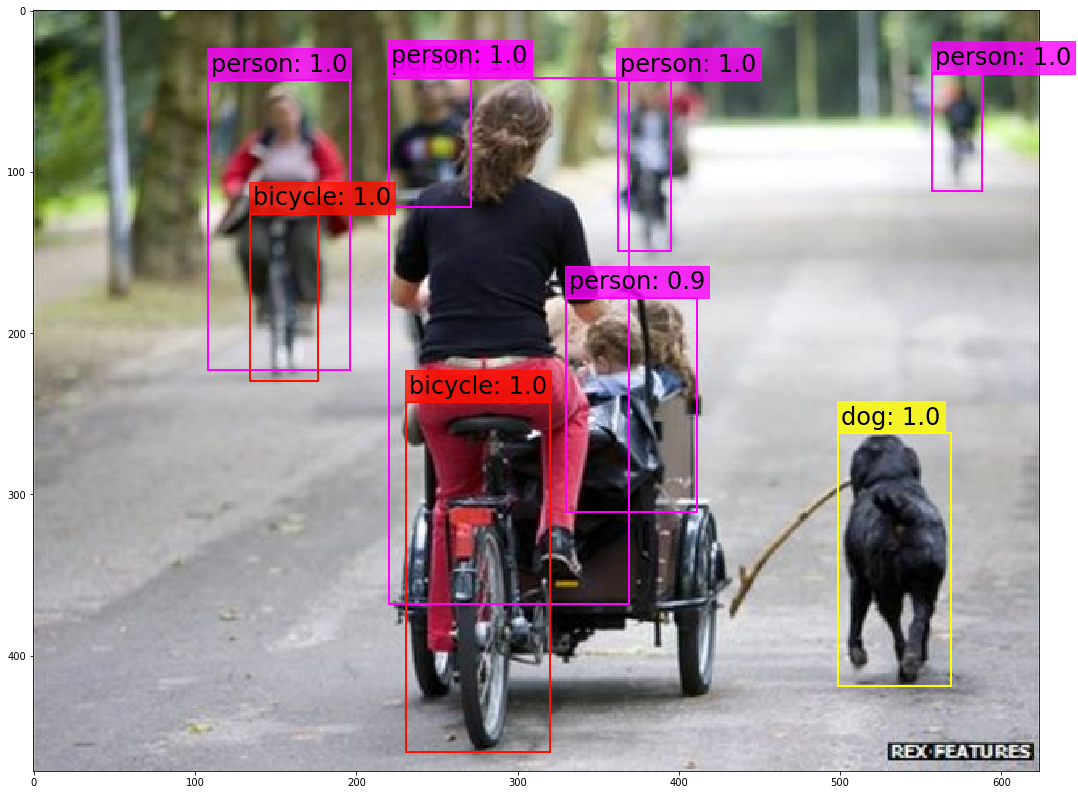

In [12]:
#Test The model
myImage =  cv2.imread('C:/Users/Bakhtawar Rehman/Desktop/2.jpg')
imageProcessor(myImage)



It took 3.014 seconds to detect the objects in the image.

Number of Objects Detected: 1 

Objects Found and Confidence Level:

1. elephant: 0.999759


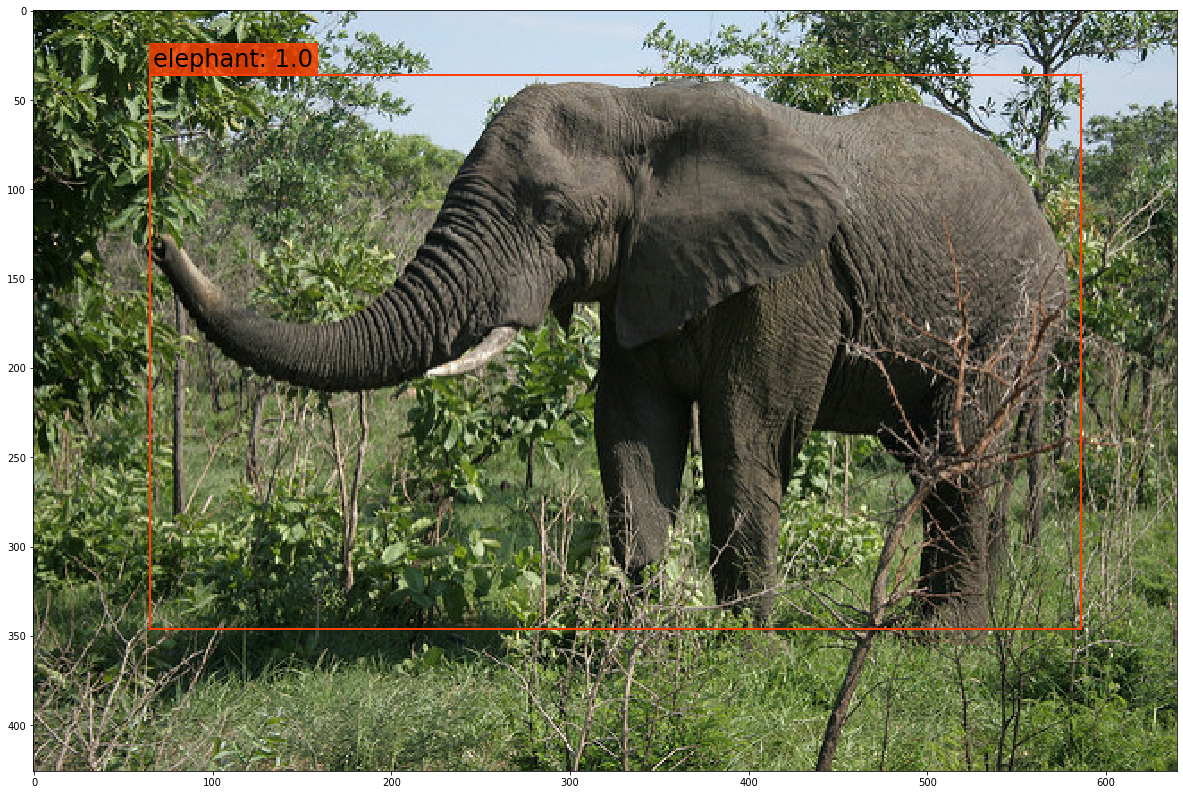

In [15]:
myImage =  cv2.imread('C:/Users/Bakhtawar Rehman/Desktop/elephant.jpg')
imageProcessor(myImage)



It took 3.665 seconds to detect the objects in the image.

Number of Objects Detected: 5 

Objects Found and Confidence Level:

1. person: 1.000000
2. person: 1.000000
3. person: 0.999963
4. motorbike: 0.996477
5. person: 1.000000


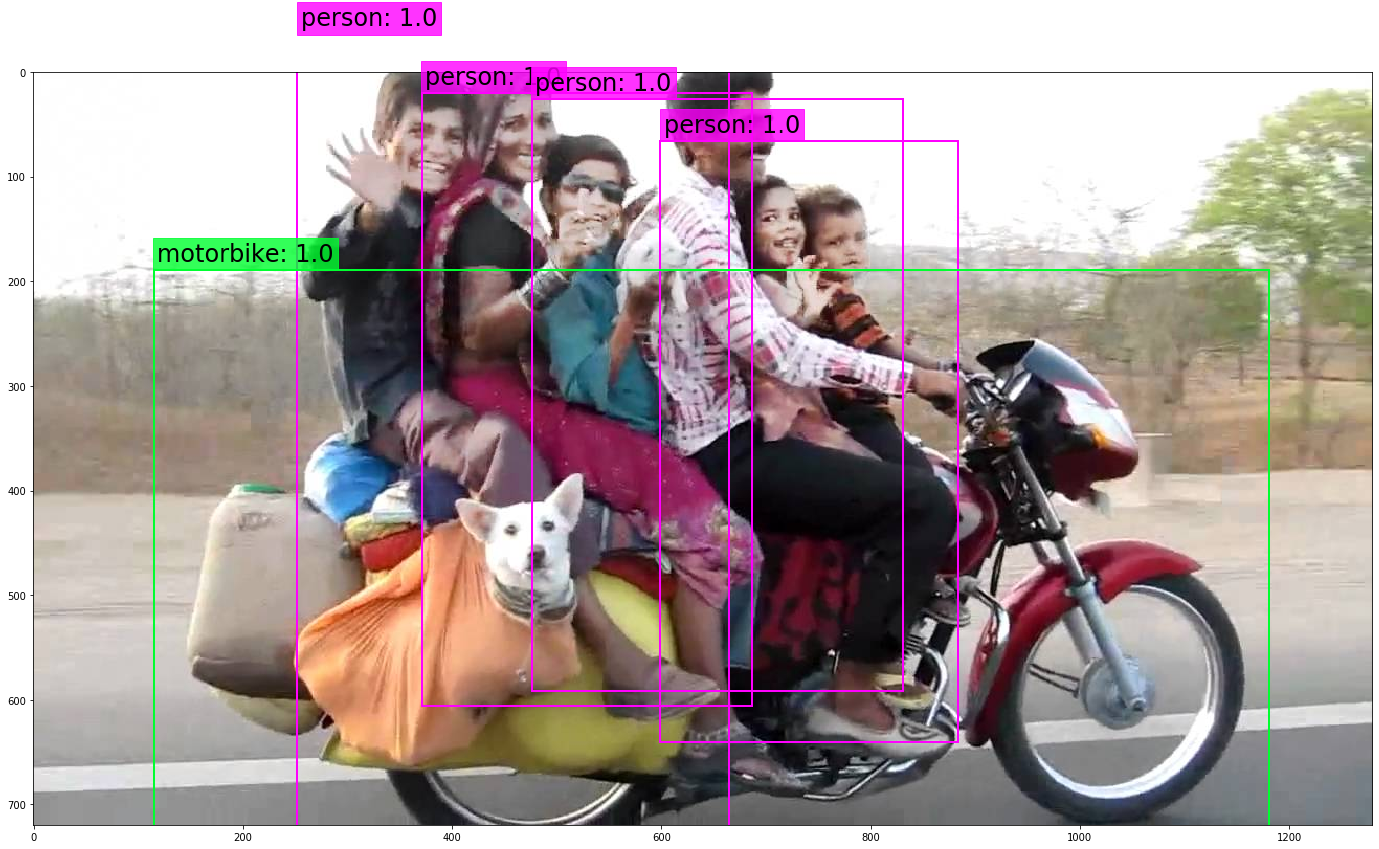

In [18]:
#Here we go checking this algorithm wit the most competetivie image.
myImage =  cv2.imread('C:/Users/Bakhtawar Rehman/Desktop/3.jpg')
imageProcessor(myImage)